In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
import datetime
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn; seaborn.set()
import sklearn.decomposition as skd
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import sklearn.preprocessing as pps
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas

/Users/ashleighdiamond/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


House Sales in King County, USA
-----

We are all familiar with the housing market price boom in San Francisco. Seattle is having a similar situation. 

According to The Seattle Times, the housing prices in the Seattle area have nearly doubled in the past 5 years. Here is a map of the one-year price changes in the Seattle Area. As you can see they have had average house price increases to less than 0% to 18% in the past year. 



<img src="King.png" height="800"/>

- Surging home prices


My data was downloaded from Kaggle. It includes homes from 2014 to 2015. I used logistic regression, decision trees, and random forests to analyze my data.  

Data Cleaning
------

-	A majority of my data cleaning consisted of me going through my categorical variables and getting rid of values within those categories that did not have significant information. For example if you look at this bathroom count, you will notice that there are under 11 instances where bathrooms =0 or bathrooms =6. So I decided to remove all of the instances where bathrooms equaled 0 and 6, because those numbers were not properly represented. 
-	Discarded features with less than 50 instances (zipcode threshold 100)
-	Bucketed year built into 10 year increments
-	Bucketed remodel year into Boolean of remodel vs not 
-	etc


In [2]:
#import seaborn; seaborn.set()  # plot styling
pd.__version__
df_Seattle = pd.read_csv('data/kc_house_data 2 copy.csv')
df_Seattle["remodel"] = abs(np.sign(0-df_Seattle.yr_renovated))
df_Seattle["built"] = ((df_Seattle.years_since_built/10))
df_Seattle['built'] = df_Seattle['built'].apply(round);
df_Seattle['zip_count'] = df_Seattle.groupby('zipcode', as_index=False)['zipcode'].transform(lambda s: s.count())#drop features that were created off one another
df_Seattle=df_Seattle.drop(["id","yr_renovated","years_since_built", "yr_built"  ], axis=1)
#df_Seattle.corr()

In [3]:
df_Seattle.groupby("zipcode").count()

,date,years_since_sell_2017,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,remodel,built,zip_count
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362
98002,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
98003,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
98004,317,317,317,317,317,317,317,317,317,317,...,317,317,317,317,317,317,317,317,317,317
98005,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
98006,498,498,498,498,498,498,498,498,498,498,...,498,498,498,498,498,498,498,498,498,498
98007,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
98008,283,283,283,283,283,283,283,283,283,283,...,283,283,283,283,283,283,283,283,283,283
98010,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [4]:
#if under 150 instances then drop
df_Seattle= df_Seattle[df_Seattle.zip_count >= 100]

In [5]:
df_Seattle.groupby("bathrooms").count()

,date,years_since_sell_2017,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,remodel,built,zip_count
bathrooms,,,,,,,,,,,,,,,,,,,,,
0.00,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
0.50,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
0.75,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
1.00,3817,3817,3817,3817,3817,3817,3817,3817,3817,3817,...,3817,3817,3817,3817,3817,3817,3817,3817,3817,3817
1.25,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1.50,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,...,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426
1.75,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030,...,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030
2.00,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
2.25,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,...,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026


In [6]:
df_Seattle=df_Seattle.drop(["lat","long","date"], axis=1)

In [7]:
#it depends on the condition but if anything under 50 instances drop
#bedrooms
df_Seattle= df_Seattle[df_Seattle.bedrooms >= 1]
df_Seattle= df_Seattle[df_Seattle.bedrooms <= 6]

#bathrooms (5 bathrooms has 50 instances)
#df_Seattle['bathrooms']=(df_Seattle.bathrooms/1).apply(round)
df_Seattle= df_Seattle[df_Seattle.bathrooms >= 1]
df_Seattle= df_Seattle[df_Seattle.bathrooms <= 5]
df_Seattle= df_Seattle[df_Seattle.bathrooms <= 4]
df_Seattle= df_Seattle[df_Seattle.bathrooms != 1.25]
df_Seattle['bathrooms']=(df_Seattle.bathrooms/1).apply(round)

#floors
df_Seattle['floors']=(df_Seattle.floors/1).apply(round)
df_Seattle= df_Seattle[df_Seattle.floors != 4]

#condition
df_Seattle= df_Seattle[df_Seattle.condition != 1]

#grade
df_Seattle= df_Seattle[df_Seattle.grade >= 5]
df_Seattle= df_Seattle[df_Seattle.grade != 13]

In [8]:
df_Seattle.columns

Index(['years_since_sell_2017', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'remodel', 'built', 'zip_count'],
      dtype='object')

EDA
------

-	This is a plot of my value counts for each zip code. You will notice that there are a wide variety of instances per zipcode. 
-	Almost twice as many houses were sold in 2014 than in 2015
-	A majority of the houses have not been remodeled
-	According to pair plot you can visualize trends, for example the more sq_ft living the higher the price etc. Also more bedrooms does not mean an increase in price.
-	According to scatter matrix  you will notice that some of my variables are highly correlated. For example square foot living and square foot above seem to be highly correlated. Which we can confirm by looking at the correlation matrix, they have a correlation of .86. 


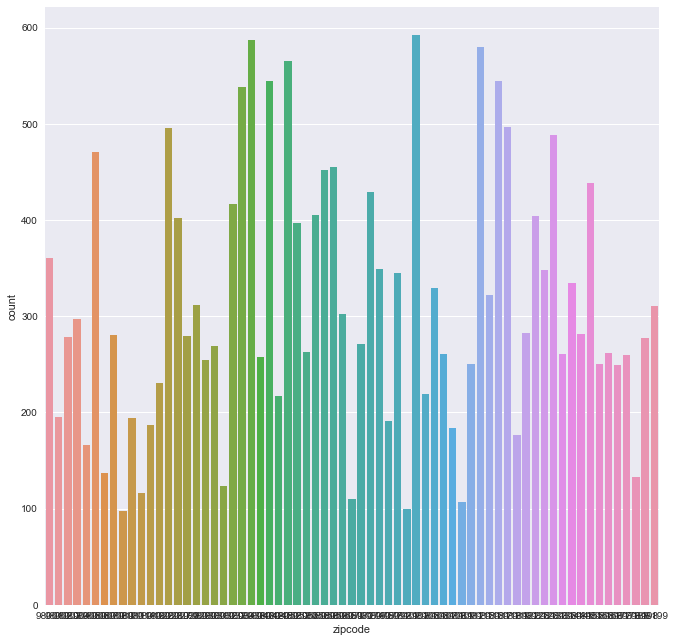

In [9]:
fig, ax = plt.subplots(figsize=(11,11))  
ax = sns.countplot(x="zipcode", data=df_Seattle,ax=ax)

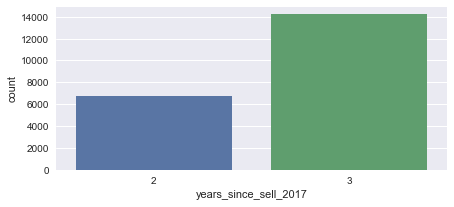

In [10]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="years_since_sell_2017", data=df_Seattle,ax=ax)

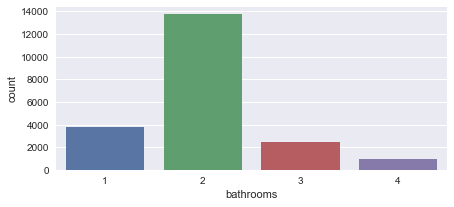

In [11]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="bathrooms", data=df_Seattle,ax=ax)

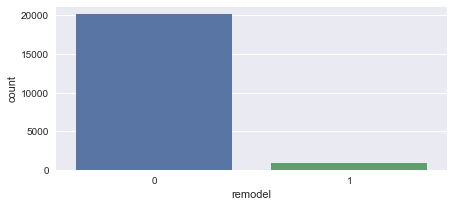

In [12]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="remodel", data=df_Seattle,ax=ax)

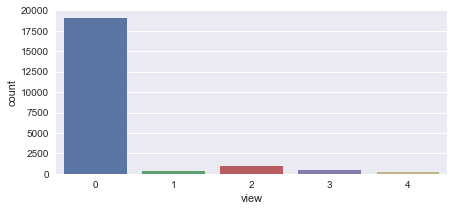

In [13]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="view", data=df_Seattle,ax=ax)

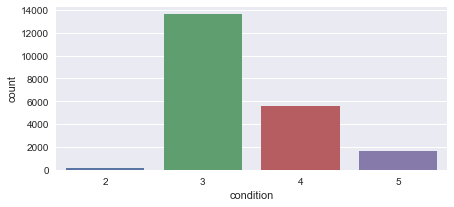

In [14]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="condition", data=df_Seattle,ax=ax)

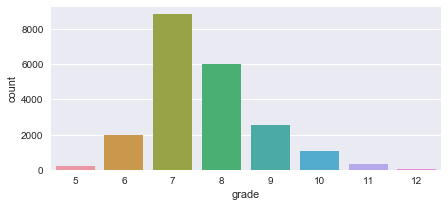

In [15]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="grade", data=df_Seattle,ax=ax)

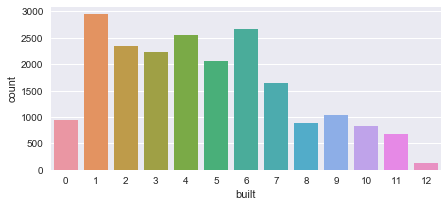

In [16]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="built", data=df_Seattle,ax=ax)

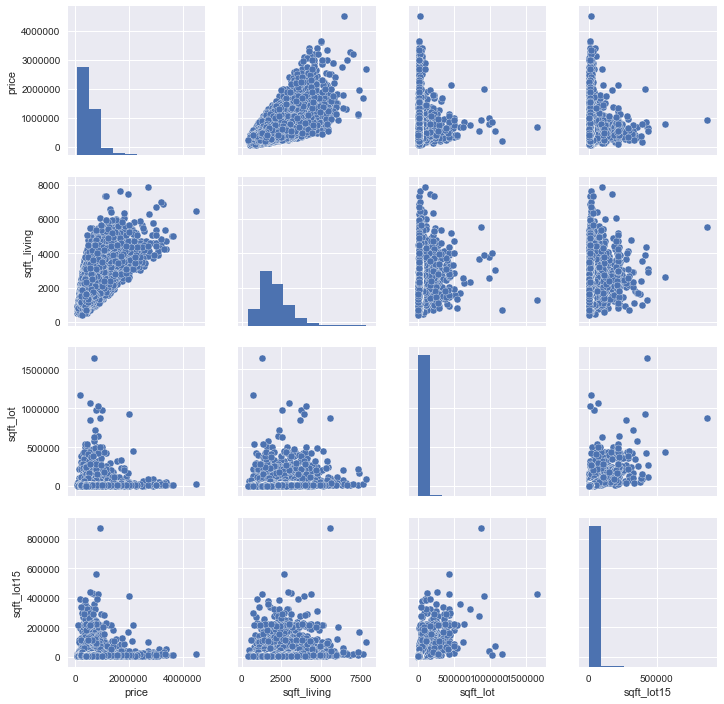

In [17]:
X3 = df_Seattle[['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']]
sns.pairplot(X3);

In [18]:
df_Seattle['bedrooms'] = df_Seattle['bedrooms'].apply(str);
df_Seattle['bathrooms'] = df_Seattle['bathrooms'].apply(str);
df_Seattle['floors'] = df_Seattle['floors'].apply(str);
df_Seattle['waterfront'] = df_Seattle['waterfront'].apply(str);
df_Seattle['view'] = df_Seattle['view'].apply(str);
df_Seattle['condition'] = df_Seattle['condition'].apply(str);
df_Seattle['grade'] = df_Seattle['grade'].apply(str);
df_Seattle['built'] = df_Seattle['built'].apply(str);
df_Seattle['remodel'] = df_Seattle['remodel'].apply(str);
df_Seattle['zipcode'] = df_Seattle['zipcode'].apply(str);
#df_Seattle['years_since_built'] = df_Seattle['years_since_built'].apply(str);
#df_Seattle['yr_renovated'] = df_Seattle['yr_renovated'].apply(str);
df_Seattle['years_since_sell_2017'] = df_Seattle['years_since_sell_2017'].apply(str);

In [19]:
df_Seattle.corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zip_count
price,1.000000,0.667946,0.079407,0.564758,0.291018,0.588903,0.072559,-0.023953
sqft_living,0.667946,1.000000,0.157690,0.861829,0.406298,0.761137,0.171464,-0.016055
sqft_lot,0.079407,0.157690,1.000000,0.167604,0.006958,0.137346,0.711631,-0.089998
sqft_above,0.564758,0.861829,0.167604,1.000000,-0.113289,0.730676,0.180949,-0.006392
sqft_basement,0.291018,0.406298,0.006958,-0.113289,1.000000,0.174664,0.009896,-0.019936
sqft_living15,0.588903,0.761137,0.137346,0.730676,0.174664,1.000000,0.176953,-0.015640
sqft_lot15,0.072559,0.171464,0.711631,0.180949,0.009896,0.176953,1.000000,-0.108491
zip_count,-0.023953,-0.016055,-0.089998,-0.006392,-0.019936,-0.015640,-0.108491,1.000000


Special Bedrooms
------

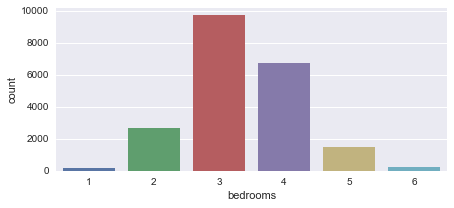

In [20]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="bedrooms", data=df_Seattle,ax=ax)

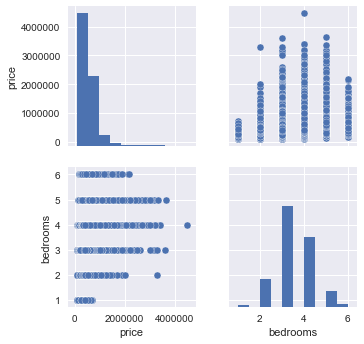

In [21]:
df_Seattle['bedrooms'] = df_Seattle['bedrooms'].apply(int);
C= df_Seattle[df_Seattle.bedrooms >= 1]
C= C[C.bedrooms <= 6]
df_Seattle['bedrooms'] = df_Seattle['bedrooms'].apply(str);
X4=C[['price', 'bedrooms']]
sns.pairplot(X4);

Feature Selection and Data Cleaning II
------

I then decided to create a linear regression using statsmodel, with all of the features. Due to the high p-val I decided to remove particular features. My biggest insight is that bedroom number was not an indicator of price. At first this puzzled me, because bedroom count is usually the first thing that people look for when purchasing a property. However then I realized that the square footage could indicate how many bedrooms were at a particular property. I also removed around 7 or 8 different zipcodes etc. This section took around 90% of my time. I had to really think about what features and instances of features to remove. For example my model suggested that I remove all of the instances where bedrooms equaled 3 (around half of my data) then it suggested (with high p value) that I remove all of the instances where bedroom equaled 2. So rather than getting rid of over half of my data I decided to remove the bedrooms feature from my model. Also I had to play around with the bucketing of year built (built), by deciding how it should be incremented, etc. 

In [22]:
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     987.2
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:27   Log-Likelihood:            -2.7667e+05
No. Observations:               20983   AIC:                         5.536e+05
Df Residuals:                   20877   BIC:                         5.544e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.178e+05   1.58e+04     13.772      0.000      1.87e+05  2.49e+05
years_since_sell_2017[T.3] -3.012e+04   1917.683    -15.704      0.000     -3.39e+04 -2.64e+04
bathrooms[T.2]             -2412.1087   3150.679     -0.766      0.444     -8587.685  3763.468
bathrooms[T.3]              1.435e+04   4489.813      3.195      0.001      5546.618  2.31e+04
bathrooms[T.4]              3.692e+04   6109.480      6.043      0.000      2.49e+04  4.89e+04
floors[T.2]                -1.731e+04   2799.805     -6.181      0.000     -2.28e+04 -1.18e+04
floors[T.3]                -6.171e+04   6735.539     -9.162      0.000     -7.49e+04 -4.85e+04
waterfront[T.1]             4.844e+05   1.39e+04     34.750      0.000      4.57e+05  5.12e+05
view[T.1]                   7.946e+04   7556.910     10.514      0.000      6.46e+04  9.43e+04
view[T.2]                   6.744e+04   4613.918     14.617      0.000      5.84e+04  7.65e+04
view[T.3]                   1.513e+05   6356.213     23.799      0.000      1.39e+05  1.64e+05
view[T.4]                   2.934e+05   9952.622     29.480      0.000      2.74e+05  3.13e+05
condition[T.3]              1.572e+04   1.04e+04      1.513      0.130     -4647.969  3.61e+04
condition[T.4]              4.158e+04   1.04e+04      3.983      0.000      2.11e+04   6.2e+04
condition[T.5]              9.178e+04   1.08e+04      8.495      0.000      7.06e+04  1.13e+05
grade[T.11]                 1.784e+05   8615.575     20.706      0.000      1.62e+05  1.95e+05
grade[T.12]                 5.029e+05   1.83e+04     27.484      0.000      4.67e+05  5.39e+05
grade[T.5]                 -2.573e+05   1.13e+04    -22.707      0.000      -2.8e+05 -2.35e+05
grade[T.6]                 -2.526e+05   7175.213    -35.204      0.000     -2.67e+05 -2.39e+05
grade[T.7]                 -2.319e+05   5863.371    -39.557      0.000     -2.43e+05  -2.2e+05
grade[T.8]                 -1.982e+05   5237.189    -37.851      0.000     -2.08e+05 -1.88e+05
grade[T.9]                 -1.191e+05   4983.272    -23.894      0.000     -1.29e+05 -1.09e+05
zipcode[T.98002]            8541.0708   1.15e+04      0.740      0.460     -1.41e+04  3.12e+04
zipcode[T.98003]            1324.8243   1.03e+04      0.128      0.898      -1.9e+04  2.16e+04
zipcode[T.98004]            7.413e+05   1.04e+04     71.551      0.000      7.21e+05  7.62e+05
zipcode[T.98005]            3.201e+05   1.23e+04     25.978      0.000      2.96e+05  3.44e+05
zipcode[T.98006]            2.625e+05   9276.135     28.299      0.000      2.44e+05  2.81e+05
zipcode[T.98007]            2.574e+05   1.31e+04     19.698      0.000      2.32e+05  2.83e+05
zipcode[T.98008]            2.619e+05   1.04e+04     25.135      0.000      2.41e+05  2.82e+05
zipcode[T.98010]            6.423e+04   1.4

In [23]:
#ended up rerunning everything with bedrooms not included my model suggested that I remove
# almost every bedroom (which would mean that I did not have any data to work with)

#df_Seattle['bedrooms'] = Training_DF['built'].apply(int);
#df_Seattle.ix[df_Seattle.bedrooms == '6', ['bedrooms']] ='5'
#df_Seattle= df_Seattle[df_Seattle.bedrooms != '5']
#results=smf.ols(formula="price~ years_since_sell_2017 + bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
#results.summary()

In [24]:
df_Seattle.groupby("zipcode").count()

,years_since_sell_2017,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,remodel,built,zip_count
zipcode,,,,,,,,,,,,,,,,,,
98001,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
98002,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
98003,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278
98004,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297
98005,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
98006,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471
98007,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
98008,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280
98010,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98


In [25]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98003']
results=smf.ols(formula="price~ years_since_sell_2017 + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     979.8
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:31   Log-Likelihood:            -2.7308e+05
No. Observations:               20705   AIC:                         5.464e+05
Df Residuals:                   20600   BIC:                         5.472e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.182e+05   1.59e+04     13.710      0.000      1.87e+05  2.49e+05
years_since_sell_2017[T.3]  -3.05e+04   1938.570    -15.735      0.000     -3.43e+04 -2.67e+04
bathrooms[T.2]             -2568.1287   3186.438     -0.806      0.420     -8813.799  3677.542
bathrooms[T.3]              1.392e+04   4536.805      3.068      0.002      5025.903  2.28e+04
bathrooms[T.4]              3.618e+04   6158.124      5.876      0.000      2.41e+04  4.83e+04
floors[T.2]                -1.749e+04   2828.940     -6.181      0.000      -2.3e+04 -1.19e+04
floors[T.3]                -6.165e+04   6771.698     -9.104      0.000     -7.49e+04 -4.84e+04
waterfront[T.1]             4.841e+05    1.4e+04     34.597      0.000      4.57e+05  5.12e+05
view[T.1]                    8.06e+04   7660.547     10.521      0.000      6.56e+04  9.56e+04
view[T.2]                   6.875e+04   4670.596     14.720      0.000      5.96e+04  7.79e+04
view[T.3]                   1.528e+05   6418.068     23.808      0.000       1.4e+05  1.65e+05
view[T.4]                   2.924e+05   9992.686     29.257      0.000      2.73e+05  3.12e+05
condition[T.3]              1.491e+04   1.05e+04      1.425      0.154     -5602.979  3.54e+04
condition[T.4]              4.082e+04   1.05e+04      3.882      0.000      2.02e+04  6.14e+04
condition[T.5]              9.085e+04   1.09e+04      8.351      0.000      6.95e+04  1.12e+05
grade[T.11]                 1.772e+05   8669.296     20.445      0.000       1.6e+05  1.94e+05
grade[T.12]                     5e+05   1.84e+04     27.208      0.000      4.64e+05  5.36e+05
grade[T.5]                 -2.585e+05   1.14e+04    -22.680      0.000     -2.81e+05 -2.36e+05
grade[T.6]                 -2.541e+05   7237.347    -35.108      0.000     -2.68e+05  -2.4e+05
grade[T.7]                  -2.34e+05   5914.965    -39.561      0.000     -2.46e+05 -2.22e+05
grade[T.8]                 -1.995e+05   5285.454    -37.741      0.000      -2.1e+05 -1.89e+05
grade[T.9]                 -1.204e+05   5022.716    -23.962      0.000      -1.3e+05 -1.11e+05
zipcode[T.98002]            8888.8529   1.16e+04      0.767      0.443     -1.38e+04  3.16e+04
zipcode[T.98004]            7.396e+05   1.04e+04     71.102      0.000      7.19e+05   7.6e+05
zipcode[T.98005]            3.187e+05   1.24e+04     25.766      0.000      2.94e+05  3.43e+05
zipcode[T.98006]            2.609e+05   9314.639     28.009      0.000      2.43e+05  2.79e+05
zipcode[T.98007]            2.568e+05   1.31e+04     19.574      0.000      2.31e+05  2.83e+05
zipcode[T.98008]            2.613e+05   1.05e+04     24.973      0.000      2.41e+05  2.82e+05
zipcode[T.98010]            6.407e+04   1.49e+04      4.304      0.000      3.49e+04  9.32e+04
zipcode[T.98011]            1.407e+05   1.1

In [26]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98070']
results=smf.ols(formula="price~ years_since_sell_2017 + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1004.
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:33   Log-Likelihood:            -2.7149e+05
No. Observations:               20595   AIC:                         5.432e+05
Df Residuals:                   20491   BIC:                         5.440e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.169e+05   1.59e+04     13.639      0.000      1.86e+05  2.48e+05
years_since_sell_2017[T.3] -3.041e+04   1929.826    -15.758      0.000     -3.42e+04 -2.66e+04
bathrooms[T.2]             -2449.0937   3174.118     -0.772      0.440     -8670.619  3772.432
bathrooms[T.3]              1.421e+04   4519.774      3.143      0.002      5346.643  2.31e+04
bathrooms[T.4]              3.707e+04   6132.956      6.045      0.000      2.51e+04  4.91e+04
floors[T.2]                -1.783e+04   2820.125     -6.324      0.000     -2.34e+04 -1.23e+04
floors[T.3]                -6.229e+04   6732.725     -9.252      0.000     -7.55e+04 -4.91e+04
waterfront[T.1]             5.614e+05   1.49e+04     37.726      0.000      5.32e+05  5.91e+05
view[T.1]                   8.089e+04   7693.481     10.514      0.000      6.58e+04   9.6e+04
view[T.2]                   6.979e+04   4657.565     14.984      0.000      6.07e+04  7.89e+04
view[T.3]                   1.592e+05   6466.474     24.618      0.000      1.47e+05  1.72e+05
view[T.4]                   2.832e+05   1.01e+04     27.936      0.000      2.63e+05  3.03e+05
condition[T.3]              1.539e+04   1.05e+04      1.463      0.144     -5231.195   3.6e+04
condition[T.4]              4.153e+04   1.06e+04      3.929      0.000      2.08e+04  6.23e+04
condition[T.5]               9.14e+04   1.09e+04      8.361      0.000         7e+04  1.13e+05
grade[T.11]                 1.756e+05   8613.244     20.392      0.000      1.59e+05  1.93e+05
grade[T.12]                 4.939e+05   1.83e+04     27.056      0.000      4.58e+05   5.3e+05
grade[T.5]                 -2.562e+05   1.14e+04    -22.502      0.000     -2.79e+05 -2.34e+05
grade[T.6]                 -2.528e+05   7213.037    -35.055      0.000     -2.67e+05 -2.39e+05
grade[T.7]                 -2.329e+05   5889.983    -39.536      0.000     -2.44e+05 -2.21e+05
grade[T.8]                 -1.986e+05   5261.863    -37.743      0.000     -2.09e+05 -1.88e+05
grade[T.9]                 -1.198e+05   4998.344    -23.965      0.000      -1.3e+05  -1.1e+05
zipcode[T.98002]            8147.1744   1.15e+04      0.708      0.479     -1.44e+04  3.07e+04
zipcode[T.98004]            7.402e+05   1.03e+04     71.632      0.000       7.2e+05   7.6e+05
zipcode[T.98005]            3.196e+05   1.23e+04     26.010      0.000      2.95e+05  3.44e+05
zipcode[T.98006]            2.612e+05   9252.584     28.225      0.000      2.43e+05  2.79e+05
zipcode[T.98007]            2.568e+05    1.3e+04     19.708      0.000      2.31e+05  2.82e+05
zipcode[T.98008]            2.593e+05   1.04e+04     24.952      0.000      2.39e+05   2.8e+05
zipcode[T.98010]            6.615e+04   1.48e+04      4.473      0.000      3.72e+04  9.51e+04
zipcode[T.98011]            1.409e+05   1.1

In [27]:
df_Seattle.groupby("built").count()

,years_since_sell_2017,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,remodel,zip_count
built,,,,,,,,,,,,,,,,,,
0,933,933,933,933,933,933,933,933,933,933,933,933,933,933,933,933,933,933
1,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926
10,833,833,833,833,833,833,833,833,833,833,833,833,833,833,833,833,833,833
11,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680
12,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
2,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285
3,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162
4,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
5,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987


In [28]:
df_Seattle= df_Seattle[df_Seattle.built != '8']
#df_Seattle.ix[df_Seattle.built == '7', ['built']] ='789'
#df_Seattle.ix[df_Seattle.built == '8', ['built']] ='789'
#df_Seattle.ix[df_Seattle.built == '9', ['built']] ='789'
#df_Seattle.ix[df_Seattle.built == '9', ['built']] ='789'
#df_Seattle.ix[df_Seattle.built == '10', ['built']] ='over100'
#df_Seattle.ix[df_Seattle.built == '11', ['built']] ='over100'
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     973.4
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:36   Log-Likelihood:            -2.5979e+05
No. Observations:               19721   AIC:                         5.198e+05
Df Residuals:                   19618   BIC:                         5.206e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.156e+05   1.61e+04     13.426      0.000      1.84e+05  2.47e+05
years_since_sell_2017[T.3]  -2.96e+04   1955.143    -15.137      0.000     -3.34e+04 -2.58e+04
bathrooms[T.2]             -3892.9570   3276.772     -1.188      0.235     -1.03e+04  2529.794
bathrooms[T.3]              1.157e+04   4594.048      2.519      0.012      2566.507  2.06e+04
bathrooms[T.4]              3.425e+04   6220.401      5.505      0.000      2.21e+04  4.64e+04
floors[T.2]                -2.185e+04   2880.773     -7.584      0.000     -2.75e+04 -1.62e+04
floors[T.3]                -6.789e+04   6738.400    -10.075      0.000     -8.11e+04 -5.47e+04
waterfront[T.1]             5.526e+05   1.53e+04     36.061      0.000      5.23e+05  5.83e+05
view[T.1]                   8.229e+04   7852.717     10.479      0.000      6.69e+04  9.77e+04
view[T.2]                   6.845e+04   4760.901     14.377      0.000      5.91e+04  7.78e+04
view[T.3]                   1.587e+05   6619.657     23.968      0.000      1.46e+05  1.72e+05
view[T.4]                    2.88e+05   1.04e+04     27.660      0.000      2.68e+05  3.08e+05
condition[T.3]              1.598e+04   1.07e+04      1.491      0.136     -5027.097   3.7e+04
condition[T.4]              4.245e+04   1.08e+04      3.943      0.000      2.13e+04  6.36e+04
condition[T.5]              9.217e+04   1.11e+04      8.273      0.000      7.03e+04  1.14e+05
grade[T.11]                 1.727e+05   8602.032     20.077      0.000      1.56e+05   1.9e+05
grade[T.12]                 4.887e+05   1.83e+04     26.738      0.000      4.53e+05  5.25e+05
grade[T.5]                   -2.4e+05   1.22e+04    -19.697      0.000     -2.64e+05 -2.16e+05
grade[T.6]                 -2.442e+05   7320.570    -33.365      0.000     -2.59e+05  -2.3e+05
grade[T.7]                 -2.242e+05   5914.358    -37.901      0.000     -2.36e+05 -2.13e+05
grade[T.8]                 -1.913e+05   5279.167    -36.229      0.000     -2.02e+05 -1.81e+05
grade[T.9]                 -1.138e+05   4998.680    -22.769      0.000     -1.24e+05 -1.04e+05
zipcode[T.98002]            7080.2115   1.15e+04      0.615      0.539     -1.55e+04  2.97e+04
zipcode[T.98004]            7.457e+05   1.03e+04     72.542      0.000      7.26e+05  7.66e+05
zipcode[T.98005]            3.247e+05   1.22e+04     26.602      0.000      3.01e+05  3.49e+05
zipcode[T.98006]            2.668e+05   9216.001     28.953      0.000      2.49e+05  2.85e+05
zipcode[T.98007]            2.604e+05   1.29e+04     20.126      0.000      2.35e+05  2.86e+05
zipcode[T.98008]            2.618e+05   1.03e+04     25.314      0.000      2.42e+05  2.82e+05
zipcode[T.98010]            6.135e+04   1.48e+04      4.143      0.000      3.23e+04  9.04e+04
zipcode[T.98011]            1.422e+05   1.1

In [29]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98198']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     973.1
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:37   Log-Likelihood:            -2.5622e+05
No. Observations:               19450   AIC:                         5.126e+05
Df Residuals:                   19348   BIC:                         5.134e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.119e+05   1.62e+04     13.084      0.000       1.8e+05  2.44e+05
years_since_sell_2017[T.3] -2.952e+04   1969.388    -14.987      0.000     -3.34e+04 -2.57e+04
bathrooms[T.2]             -4319.3215   3314.202     -1.303      0.192     -1.08e+04  2176.801
bathrooms[T.3]              1.097e+04   4633.685      2.366      0.018      1883.069     2e+04
bathrooms[T.4]              3.383e+04   6258.865      5.406      0.000      2.16e+04  4.61e+04
floors[T.2]                -2.227e+04   2902.753     -7.672      0.000      -2.8e+04 -1.66e+04
floors[T.3]                -6.864e+04   6754.013    -10.163      0.000     -8.19e+04 -5.54e+04
waterfront[T.1]             5.926e+05   1.58e+04     37.529      0.000      5.62e+05  6.24e+05
view[T.1]                   8.533e+04   8064.483     10.582      0.000      6.95e+04  1.01e+05
view[T.2]                   6.946e+04   4819.150     14.414      0.000         6e+04  7.89e+04
view[T.3]                    1.62e+05   6762.040     23.955      0.000      1.49e+05  1.75e+05
view[T.4]                   2.964e+05   1.05e+04     28.094      0.000      2.76e+05  3.17e+05
condition[T.3]              1.643e+04   1.09e+04      1.511      0.131     -4878.711  3.77e+04
condition[T.4]              4.342e+04   1.09e+04      3.976      0.000       2.2e+04  6.48e+04
condition[T.5]              9.313e+04   1.13e+04      8.247      0.000       7.1e+04  1.15e+05
grade[T.11]                 1.707e+05   8617.968     19.804      0.000      1.54e+05  1.88e+05
grade[T.12]                 4.811e+05   1.83e+04     26.299      0.000      4.45e+05  5.17e+05
grade[T.5]                 -2.387e+05   1.23e+04    -19.418      0.000     -2.63e+05 -2.15e+05
grade[T.6]                 -2.422e+05   7373.039    -32.856      0.000     -2.57e+05 -2.28e+05
grade[T.7]                 -2.219e+05   5940.313    -37.353      0.000     -2.34e+05  -2.1e+05
grade[T.8]                  -1.89e+05   5292.784    -35.710      0.000     -1.99e+05 -1.79e+05
grade[T.9]                 -1.122e+05   5007.786    -22.412      0.000     -1.22e+05 -1.02e+05
zipcode[T.98002]            7290.4970   1.15e+04      0.633      0.527     -1.53e+04  2.99e+04
zipcode[T.98004]            7.456e+05   1.03e+04     72.510      0.000      7.25e+05  7.66e+05
zipcode[T.98005]            3.249e+05   1.22e+04     26.605      0.000      3.01e+05  3.49e+05
zipcode[T.98006]            2.663e+05   9219.407     28.883      0.000      2.48e+05  2.84e+05
zipcode[T.98007]            2.609e+05   1.29e+04     20.152      0.000      2.35e+05  2.86e+05
zipcode[T.98008]            2.606e+05   1.03e+04     25.195      0.000       2.4e+05  2.81e+05
zipcode[T.98010]            6.128e+04   1.48e+04      4.138      0.000      3.23e+04  9.03e+04
zipcode[T.98011]             1.42e+05   1.1

In [30]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98002']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     964.8
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:39   Log-Likelihood:            -2.5378e+05
No. Observations:               19259   AIC:                         5.078e+05
Df Residuals:                   19158   BIC:                         5.086e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.107e+05   1.63e+04     12.943      0.000      1.79e+05  2.43e+05
years_since_sell_2017[T.3] -2.969e+04   1987.213    -14.943      0.000     -3.36e+04 -2.58e+04
bathrooms[T.2]             -4073.8916   3349.302     -1.216      0.224     -1.06e+04  2491.035
bathrooms[T.3]              1.159e+04   4675.828      2.479      0.013      2424.896  2.08e+04
bathrooms[T.4]              3.396e+04   6297.663      5.392      0.000      2.16e+04  4.63e+04
floors[T.2]                -2.237e+04   2930.228     -7.634      0.000     -2.81e+04 -1.66e+04
floors[T.3]                -6.818e+04   6790.576    -10.040      0.000     -8.15e+04 -5.49e+04
waterfront[T.1]             5.924e+05   1.59e+04     37.364      0.000      5.61e+05  6.23e+05
view[T.1]                   8.516e+04   8096.950     10.517      0.000      6.93e+04  1.01e+05
view[T.2]                   6.941e+04   4842.052     14.334      0.000      5.99e+04  7.89e+04
view[T.3]                   1.618e+05   6789.559     23.830      0.000      1.48e+05  1.75e+05
view[T.4]                   2.962e+05   1.06e+04     27.968      0.000      2.75e+05  3.17e+05
condition[T.3]              1.635e+04   1.09e+04      1.497      0.134     -5049.737  3.77e+04
condition[T.4]              4.343e+04    1.1e+04      3.960      0.000      2.19e+04  6.49e+04
condition[T.5]              9.343e+04   1.13e+04      8.232      0.000      7.12e+04  1.16e+05
grade[T.11]                 1.705e+05   8653.018     19.705      0.000      1.54e+05  1.87e+05
grade[T.12]                 4.807e+05   1.84e+04     26.174      0.000      4.45e+05  5.17e+05
grade[T.5]                 -2.379e+05   1.26e+04    -18.911      0.000     -2.63e+05 -2.13e+05
grade[T.6]                 -2.427e+05   7439.392    -32.626      0.000     -2.57e+05 -2.28e+05
grade[T.7]                 -2.215e+05   5976.300    -37.063      0.000     -2.33e+05  -2.1e+05
grade[T.8]                 -1.885e+05   5318.928    -35.448      0.000     -1.99e+05 -1.78e+05
grade[T.9]                 -1.121e+05   5028.570    -22.289      0.000     -1.22e+05 -1.02e+05
zipcode[T.98004]            7.453e+05   1.03e+04     72.177      0.000      7.25e+05  7.66e+05
zipcode[T.98005]            3.247e+05   1.23e+04     26.476      0.000      3.01e+05  3.49e+05
zipcode[T.98006]            2.662e+05   9257.120     28.756      0.000      2.48e+05  2.84e+05
zipcode[T.98007]            2.608e+05    1.3e+04     20.065      0.000      2.35e+05  2.86e+05
zipcode[T.98008]            2.605e+05   1.04e+04     25.079      0.000       2.4e+05  2.81e+05
zipcode[T.98010]            6.128e+04   1.49e+04      4.122      0.000      3.21e+04  9.04e+04
zipcode[T.98011]             1.42e+05   1.15e+04     12.310      0.000      1.19e+05  1.65e+05
zipcode[T.98014]            1.018e+05    1.

In [31]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98032']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     964.8
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:42   Log-Likelihood:            -2.5223e+05
No. Observations:               19138   AIC:                         5.047e+05
Df Residuals:                   19038   BIC:                         5.054e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.095e+05   1.63e+04     12.835      0.000      1.78e+05  2.42e+05
years_since_sell_2017[T.3] -2.982e+04   1997.392    -14.927      0.000     -3.37e+04 -2.59e+04
bathrooms[T.2]             -3724.6804   3372.885     -1.104      0.269     -1.03e+04  2886.474
bathrooms[T.3]              1.175e+04   4700.097      2.500      0.012      2539.119   2.1e+04
bathrooms[T.4]              3.377e+04   6321.801      5.341      0.000      2.14e+04  4.62e+04
floors[T.2]                -2.252e+04   2949.895     -7.633      0.000     -2.83e+04 -1.67e+04
floors[T.3]                -6.829e+04   6811.349    -10.026      0.000     -8.16e+04 -5.49e+04
waterfront[T.1]             5.902e+05   1.59e+04     37.115      0.000      5.59e+05  6.21e+05
view[T.1]                   8.503e+04   8114.282     10.479      0.000      6.91e+04  1.01e+05
view[T.2]                   6.978e+04   4861.977     14.352      0.000      6.02e+04  7.93e+04
view[T.3]                   1.617e+05   6804.628     23.765      0.000      1.48e+05  1.75e+05
view[T.4]                   2.985e+05   1.06e+04     28.033      0.000      2.78e+05  3.19e+05
condition[T.3]              1.605e+04   1.09e+04      1.467      0.142     -5396.094  3.75e+04
condition[T.4]              4.314e+04    1.1e+04      3.924      0.000      2.16e+04  6.47e+04
condition[T.5]              9.326e+04   1.14e+04      8.198      0.000       7.1e+04  1.16e+05
grade[T.11]                 1.703e+05   8671.351     19.640      0.000      1.53e+05  1.87e+05
grade[T.12]                 4.802e+05   1.84e+04     26.087      0.000      4.44e+05  5.16e+05
grade[T.5]                 -2.382e+05   1.27e+04    -18.723      0.000     -2.63e+05 -2.13e+05
grade[T.6]                  -2.42e+05   7467.769    -32.409      0.000     -2.57e+05 -2.27e+05
grade[T.7]                 -2.211e+05   5996.928    -36.865      0.000     -2.33e+05 -2.09e+05
grade[T.8]                  -1.88e+05   5333.138    -35.242      0.000     -1.98e+05 -1.77e+05
grade[T.9]                 -1.116e+05   5040.344    -22.143      0.000     -1.21e+05 -1.02e+05
zipcode[T.98004]            7.451e+05   1.03e+04     72.003      0.000      7.25e+05  7.65e+05
zipcode[T.98005]            3.244e+05   1.23e+04     26.396      0.000         3e+05  3.48e+05
zipcode[T.98006]            2.659e+05   9277.316     28.663      0.000      2.48e+05  2.84e+05
zipcode[T.98007]            2.607e+05    1.3e+04     20.018      0.000      2.35e+05  2.86e+05
zipcode[T.98008]            2.603e+05   1.04e+04     25.003      0.000       2.4e+05  2.81e+05
zipcode[T.98010]            6.132e+04   1.49e+04      4.116      0.000      3.21e+04  9.05e+04
zipcode[T.98011]            1.418e+05   1.16e+04     12.273      0.000      1.19e+05  1.64e+05
zipcode[T.98014]            1.018e+05    1.

In [32]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98030']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     956.7
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:44   Log-Likelihood:            -2.4908e+05
No. Observations:               18893   AIC:                         4.984e+05
Df Residuals:                   18794   BIC:                         4.991e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.107e+05   1.65e+04     12.778      0.000      1.78e+05  2.43e+05
years_since_sell_2017[T.3] -3.038e+04   2020.997    -15.032      0.000     -3.43e+04 -2.64e+04
bathrooms[T.2]             -3850.4735   3401.965     -1.132      0.258     -1.05e+04  2817.684
bathrooms[T.3]              1.117e+04   4744.389      2.354      0.019      1867.675  2.05e+04
bathrooms[T.4]              3.246e+04   6368.580      5.096      0.000         2e+04  4.49e+04
floors[T.2]                -2.239e+04   2982.640     -7.508      0.000     -2.82e+04 -1.65e+04
floors[T.3]                -6.825e+04   6860.503     -9.949      0.000     -8.17e+04 -5.48e+04
waterfront[T.1]             5.902e+05    1.6e+04     36.939      0.000      5.59e+05  6.21e+05
view[T.1]                   8.462e+04   8152.864     10.379      0.000      6.86e+04  1.01e+05
view[T.2]                   6.955e+04   4895.573     14.207      0.000         6e+04  7.91e+04
view[T.3]                   1.611e+05   6837.962     23.562      0.000      1.48e+05  1.75e+05
view[T.4]                   2.978e+05   1.07e+04     27.830      0.000      2.77e+05  3.19e+05
condition[T.3]              1.655e+04   1.11e+04      1.495      0.135     -5142.580  3.82e+04
condition[T.4]              4.391e+04   1.11e+04      3.948      0.000      2.21e+04  6.57e+04
condition[T.5]              9.404e+04   1.15e+04      8.173      0.000      7.15e+04  1.17e+05
grade[T.11]                 1.698e+05   8715.597     19.478      0.000      1.53e+05  1.87e+05
grade[T.12]                 4.796e+05   1.85e+04     25.931      0.000      4.43e+05  5.16e+05
grade[T.5]                 -2.397e+05   1.28e+04    -18.687      0.000     -2.65e+05 -2.15e+05
grade[T.6]                 -2.432e+05   7535.883    -32.270      0.000     -2.58e+05 -2.28e+05
grade[T.7]                 -2.224e+05   6048.940    -36.762      0.000     -2.34e+05 -2.11e+05
grade[T.8]                 -1.887e+05   5373.379    -35.116      0.000     -1.99e+05 -1.78e+05
grade[T.9]                 -1.115e+05   5075.532    -21.974      0.000     -1.21e+05 -1.02e+05
zipcode[T.98004]            7.442e+05   1.04e+04     71.566      0.000      7.24e+05  7.65e+05
zipcode[T.98005]            3.236e+05   1.23e+04     26.202      0.000      2.99e+05  3.48e+05
zipcode[T.98006]            2.653e+05   9322.392     28.460      0.000      2.47e+05  2.84e+05
zipcode[T.98007]            2.604e+05   1.31e+04     19.899      0.000      2.35e+05  2.86e+05
zipcode[T.98008]              2.6e+05   1.05e+04     24.856      0.000       2.4e+05  2.81e+05
zipcode[T.98010]            6.122e+04    1.5e+04      4.090      0.000      3.19e+04  9.06e+04
zipcode[T.98011]            1.417e+05   1.16e+04     12.202      0.000      1.19e+05  1.64e+05
zipcode[T.98014]            1.021e+05   1.4

In [33]:
#could not get rid of 3 bathrooms bc a majority of data
df_Seattle.groupby("bathrooms").count()

,years_since_sell_2017,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,remodel,built,zip_count
bathrooms,,,,,,,,,,,,,,,,,,
1,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129
2,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490,12490
3,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329
4,945,945,945,945,945,945,945,945,945,945,945,945,945,945,945,945,945,945


In [34]:
df_Seattlebathrooms= df_Seattle[df_Seattle.bathrooms != '3']
#results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
#results.summary()

In [35]:
#wout removing 3 bathrooms
df_Seattle= df_Seattle[df_Seattle.zipcode != '98042']
#with removing 3 bathrooms
#df_Seattle= df_Seattle[df_Seattle.zipcode != '98022']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     928.8
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:46   Log-Likelihood:            -2.4210e+05
No. Observations:               18350   AIC:                         4.844e+05
Df Residuals:                   18252   BIC:                         4.852e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.067e+05   1.69e+04     12.264      0.000      1.74e+05   2.4e+05
years_since_sell_2017[T.3] -3.081e+04   2073.145    -14.862      0.000     -3.49e+04 -2.67e+04
bathrooms[T.2]             -4447.4644   3479.415     -1.278      0.201     -1.13e+04  2372.516
bathrooms[T.3]              1.043e+04   4843.434      2.154      0.031       940.448  1.99e+04
bathrooms[T.4]              3.074e+04   6490.923      4.736      0.000       1.8e+04  4.35e+04
floors[T.2]                -2.252e+04   3051.733     -7.379      0.000     -2.85e+04 -1.65e+04
floors[T.3]                -6.812e+04   6954.557     -9.795      0.000     -8.17e+04 -5.45e+04
waterfront[T.1]             5.905e+05   1.61e+04     36.602      0.000      5.59e+05  6.22e+05
view[T.1]                   8.334e+04   8234.436     10.121      0.000      6.72e+04  9.95e+04
view[T.2]                   6.878e+04   4964.606     13.854      0.000       5.9e+04  7.85e+04
view[T.3]                   1.589e+05   6929.339     22.934      0.000      1.45e+05  1.72e+05
view[T.4]                   2.956e+05   1.08e+04     27.344      0.000      2.74e+05  3.17e+05
condition[T.3]              1.555e+04   1.13e+04      1.370      0.171     -6688.920  3.78e+04
condition[T.4]              4.358e+04   1.14e+04      3.823      0.000      2.12e+04  6.59e+04
condition[T.5]              9.362e+04   1.18e+04      7.935      0.000      7.05e+04  1.17e+05
grade[T.11]                 1.669e+05   8828.258     18.910      0.000       1.5e+05  1.84e+05
grade[T.12]                 4.752e+05   1.87e+04     25.429      0.000      4.39e+05  5.12e+05
grade[T.5]                 -2.449e+05   1.32e+04    -18.624      0.000     -2.71e+05 -2.19e+05
grade[T.6]                 -2.439e+05   7705.251    -31.657      0.000     -2.59e+05 -2.29e+05
grade[T.7]                 -2.229e+05   6181.078    -36.062      0.000     -2.35e+05 -2.11e+05
grade[T.8]                 -1.884e+05   5482.027    -34.362      0.000     -1.99e+05 -1.78e+05
grade[T.9]                 -1.108e+05   5161.587    -21.470      0.000     -1.21e+05 -1.01e+05
zipcode[T.98004]            7.418e+05   1.05e+04     70.614      0.000      7.21e+05  7.62e+05
zipcode[T.98005]            3.213e+05   1.25e+04     25.755      0.000      2.97e+05  3.46e+05
zipcode[T.98006]            2.632e+05   9419.881     27.943      0.000      2.45e+05  2.82e+05
zipcode[T.98007]            2.593e+05   1.32e+04     19.617      0.000      2.33e+05  2.85e+05
zipcode[T.98008]            2.595e+05   1.06e+04     24.562      0.000      2.39e+05   2.8e+05
zipcode[T.98010]            6.103e+04   1.51e+04      4.037      0.000      3.14e+04  9.07e+04
zipcode[T.98011]            1.404e+05   1.17e+04     11.977      0.000      1.17e+05  1.63e+05
zipcode[T.98014]            1.027e+05   1.4

In [36]:
df_Seattle= df_Seattle[df_Seattle.zipcode != '98022']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     924.3
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:48   Log-Likelihood:            -2.3926e+05
No. Observations:               18130   AIC:                         4.787e+05
Df Residuals:                   18033   BIC:                         4.795e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.043e+05    1.7e+04     12.038      0.000      1.71e+05  2.38e+05
years_since_sell_2017[T.3] -3.125e+04   2093.170    -14.932      0.000     -3.54e+04 -2.72e+04
bathrooms[T.2]             -4972.8827   3517.058     -1.414      0.157     -1.19e+04  1920.888
bathrooms[T.3]               1.01e+04   4891.332      2.066      0.039       516.354  1.97e+04
bathrooms[T.4]              3.053e+04   6538.147      4.670      0.000      1.77e+04  4.33e+04
floors[T.2]                -2.224e+04   3094.306     -7.189      0.000     -2.83e+04 -1.62e+04
floors[T.3]                -6.744e+04   7002.353     -9.631      0.000     -8.12e+04 -5.37e+04
waterfront[T.1]             5.884e+05   1.62e+04     36.310      0.000      5.57e+05   6.2e+05
view[T.1]                   8.372e+04   8264.190     10.131      0.000      6.75e+04  9.99e+04
view[T.2]                    7.05e+04   5066.231     13.916      0.000      6.06e+04  8.04e+04
view[T.3]                   1.662e+05   7175.926     23.154      0.000      1.52e+05   1.8e+05
view[T.4]                   2.974e+05   1.09e+04     27.322      0.000      2.76e+05  3.19e+05
condition[T.3]              1.564e+04   1.14e+04      1.369      0.171     -6757.627   3.8e+04
condition[T.4]              4.351e+04   1.15e+04      3.787      0.000       2.1e+04   6.6e+04
condition[T.5]              9.397e+04   1.19e+04      7.897      0.000      7.06e+04  1.17e+05
grade[T.11]                  1.66e+05   8861.892     18.727      0.000      1.49e+05  1.83e+05
grade[T.12]                 4.736e+05   1.88e+04     25.247      0.000      4.37e+05   5.1e+05
grade[T.5]                 -2.444e+05   1.33e+04    -18.322      0.000     -2.71e+05 -2.18e+05
grade[T.6]                 -2.426e+05   7782.083    -31.177      0.000     -2.58e+05 -2.27e+05
grade[T.7]                 -2.217e+05   6230.588    -35.580      0.000     -2.34e+05 -2.09e+05
grade[T.8]                 -1.869e+05   5519.233    -33.857      0.000     -1.98e+05 -1.76e+05
grade[T.9]                 -1.098e+05   5190.519    -21.156      0.000      -1.2e+05 -9.96e+04
zipcode[T.98004]            7.417e+05   1.05e+04     70.336      0.000      7.21e+05  7.62e+05
zipcode[T.98005]            3.213e+05   1.25e+04     25.664      0.000      2.97e+05  3.46e+05
zipcode[T.98006]            2.628e+05   9453.622     27.800      0.000      2.44e+05  2.81e+05
zipcode[T.98007]            2.595e+05   1.33e+04     19.566      0.000      2.34e+05  2.85e+05
zipcode[T.98008]            2.593e+05   1.06e+04     24.456      0.000      2.39e+05   2.8e+05
zipcode[T.98010]            6.071e+04   1.52e+04      3.998      0.000      3.09e+04  9.05e+04
zipcode[T.98011]            1.405e+05   1.18e+04     11.940      0.000      1.17e+05  1.64e+05
zipcode[T.98014]            1.022e+05   1.4

In [37]:
#could not remove condition=2 because its a majority of my data
df_Seattle.groupby("condition").count()

,years_since_sell_2017,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,remodel,built,zip_count
condition,,,,,,,,,,,,,,,,,,
2,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
3,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089,12089
4,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514
5,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390


In [38]:
df_Seattle.groupby("built").count()

,years_since_sell_2017,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,remodel,zip_count
built,,,,,,,,,,,,,,,,,,
0,853,853,853,853,853,853,853,853,853,853,853,853,853,853,853,853,853,853
1,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750
10,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792
11,661,661,661,661,661,661,661,661,661,661,661,661,661,661,661,661,661,661
12,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
2,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067
3,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915
4,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236
5,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745


In [39]:
df_Seattle= df_Seattle[df_Seattle.built != '9']
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     899.8
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:51   Log-Likelihood:            -2.2557e+05
No. Observations:               17115   AIC:                         4.513e+05
Df Residuals:                   17019   BIC:                         4.521e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.067e+05   1.72e+04     12.008      0.000      1.73e+05   2.4e+05
years_since_sell_2017[T.3] -3.017e+04   2115.026    -14.266      0.000     -3.43e+04  -2.6e+04
bathrooms[T.2]             -6060.9570   3666.264     -1.653      0.098     -1.32e+04  1125.299
bathrooms[T.3]              8808.4629   5025.188      1.753      0.080     -1041.425  1.87e+04
bathrooms[T.4]              2.976e+04   6624.277      4.493      0.000      1.68e+04  4.27e+04
floors[T.2]                -2.542e+04   3189.450     -7.969      0.000     -3.17e+04 -1.92e+04
floors[T.3]                 -7.29e+04   7025.727    -10.376      0.000     -8.67e+04 -5.91e+04
waterfront[T.1]             5.567e+05    1.7e+04     32.666      0.000      5.23e+05   5.9e+05
view[T.1]                    9.01e+04   8426.682     10.693      0.000      7.36e+04  1.07e+05
view[T.2]                   6.815e+04   5216.748     13.063      0.000      5.79e+04  7.84e+04
view[T.3]                   1.619e+05   7367.954     21.973      0.000      1.47e+05  1.76e+05
view[T.4]                   3.231e+05   1.11e+04     29.154      0.000      3.01e+05  3.45e+05
condition[T.3]              1.817e+04   1.18e+04      1.536      0.124     -5011.846  4.14e+04
condition[T.4]               4.52e+04   1.19e+04      3.802      0.000      2.19e+04  6.85e+04
condition[T.5]               9.69e+04   1.23e+04      7.856      0.000      7.27e+04  1.21e+05
grade[T.11]                 1.626e+05   8798.055     18.485      0.000      1.45e+05   1.8e+05
grade[T.12]                 4.792e+05   1.86e+04     25.712      0.000      4.43e+05  5.16e+05
grade[T.5]                 -2.362e+05   1.39e+04    -17.039      0.000     -2.63e+05 -2.09e+05
grade[T.6]                 -2.292e+05   7905.783    -28.996      0.000     -2.45e+05 -2.14e+05
grade[T.7]                 -2.122e+05   6238.296    -34.020      0.000     -2.24e+05    -2e+05
grade[T.8]                 -1.802e+05   5501.308    -32.757      0.000     -1.91e+05 -1.69e+05
grade[T.9]                 -1.067e+05   5166.556    -20.654      0.000     -1.17e+05 -9.66e+04
zipcode[T.98004]             7.51e+05   1.04e+04     72.244      0.000      7.31e+05  7.71e+05
zipcode[T.98005]            3.293e+05   1.23e+04     26.729      0.000      3.05e+05  3.53e+05
zipcode[T.98006]            2.701e+05   9306.771     29.024      0.000      2.52e+05  2.88e+05
zipcode[T.98007]            2.651e+05    1.3e+04     20.323      0.000       2.4e+05  2.91e+05
zipcode[T.98008]            2.636e+05   1.04e+04     25.277      0.000      2.43e+05  2.84e+05
zipcode[T.98010]            5.983e+04   1.49e+04      4.006      0.000      3.06e+04  8.91e+04
zipcode[T.98011]            1.437e+05   1.16e+04     12.383      0.000      1.21e+05  1.66e+05
zipcode[T.98014]            9.848e+04   1.4

In [40]:
#remove sqfootlot15 from model
results=smf.ols(formula="price~ years_since_sell_2017  + bathrooms + sqft_living + sqft_lot + floors + waterfront+view+ condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15  +built+remodel ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     909.4
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        01:23:53   Log-Likelihood:            -2.2557e+05
No. Observations:               17115   AIC:                         4.513e+05
Df Residuals:                   17020   BIC:                         4.521e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   2.074e+05   1.72e+04     12.058      0.000      1.74e+05  2.41e+05
years_since_sell_2017[T.3] -3.017e+04   2115.055    -14.266      0.000     -3.43e+04  -2.6e+04
bathrooms[T.2]             -5974.1981   3665.618     -1.630      0.103     -1.32e+04  1210.791
bathrooms[T.3]              8955.8118   5023.790      1.783      0.075      -891.336  1.88e+04
bathrooms[T.4]              2.986e+04   6623.846      4.508      0.000      1.69e+04  4.28e+04
floors[T.2]                -2.544e+04   3189.434     -7.977      0.000     -3.17e+04 -1.92e+04
floors[T.3]                -7.302e+04   7025.098    -10.394      0.000     -8.68e+04 -5.92e+04
waterfront[T.1]             5.565e+05    1.7e+04     32.657      0.000      5.23e+05   5.9e+05
view[T.1]                   9.021e+04   8426.379     10.705      0.000      7.37e+04  1.07e+05
view[T.2]                   6.814e+04   5216.818     13.062      0.000      5.79e+04  7.84e+04
view[T.3]                   1.619e+05   7367.992     21.978      0.000      1.47e+05  1.76e+05
view[T.4]                   3.232e+05   1.11e+04     29.157      0.000      3.01e+05  3.45e+05
condition[T.3]              1.791e+04   1.18e+04      1.515      0.130     -5268.133  4.11e+04
condition[T.4]              4.493e+04   1.19e+04      3.780      0.000      2.16e+04  6.82e+04
condition[T.5]              9.657e+04   1.23e+04      7.831      0.000      7.24e+04  1.21e+05
grade[T.11]                 1.627e+05   8798.167     18.487      0.000      1.45e+05   1.8e+05
grade[T.12]                 4.789e+05   1.86e+04     25.700      0.000      4.42e+05  5.15e+05
grade[T.5]                 -2.363e+05   1.39e+04    -17.047      0.000     -2.63e+05 -2.09e+05
grade[T.6]                 -2.294e+05   7904.639    -29.022      0.000     -2.45e+05 -2.14e+05
grade[T.7]                 -2.124e+05   6237.548    -34.044      0.000     -2.25e+05    -2e+05
grade[T.8]                 -1.803e+05   5501.106    -32.770      0.000     -1.91e+05 -1.69e+05
grade[T.9]                 -1.068e+05   5165.838    -20.678      0.000     -1.17e+05 -9.67e+04
zipcode[T.98004]             7.51e+05   1.04e+04     72.246      0.000      7.31e+05  7.71e+05
zipcode[T.98005]            3.292e+05   1.23e+04     26.720      0.000      3.05e+05  3.53e+05
zipcode[T.98006]            2.703e+05   9306.022     29.043      0.000      2.52e+05  2.89e+05
zipcode[T.98007]            2.652e+05    1.3e+04     20.332      0.000       2.4e+05  2.91e+05
zipcode[T.98008]            2.637e+05   1.04e+04     25.287      0.000      2.43e+05  2.84e+05
zipcode[T.98010]            5.843e+04   1.49e+04      3.924      0.000      2.92e+04  8.76e+04
zipcode[T.98011]            1.438e+05   1.16e+04     12.392      0.000      1.21e+05  1.67e+05
zipcode[T.98014]             9.63e+04   1.4

Scikit-learn
------

I then used scikit-learn to test linear regression, decision tree, and random forests on my model with my new and improved dataset. Overall I discovered that my linear regression was able to predict price within +-2% at 100% accuracy.

I wanted to see if my edited dataset made a difference of predictability. So I reran my three models with the entire dataset (talking about the removed rows, and features). I discarded the feature id, because it was just the id number of each property sold. I ended up not really getting a difference between my updated dataset and non updated dataset. This was slightly frustrating because of all of the time that I spent on updating my dataset. 

My high accuracy, caused me to question my model, so I decided to rerun the model (at the end in section called test id )on the entire dataset using the id feature. My accuracy for linear regression went from around 100% to 5.4%


In [41]:

X=df_Seattle.drop(["price"],axis=1)
X=df_Seattle.drop(["bedrooms"],axis=1)
#X=pps.scale(X)
y=df_Seattle["price"]
X=np.asarray(X)
y=np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [42]:
def readResults(y_train, y_train_predicted, y_test, y_test_predicted):
    z=y_test-y_test_predicted
    x=(y_test)/(y_test_predicted)
    predictions_test_correct=0
    test_len=len(y_test)
    exact_correct_test=0
    money_off_test=0
    
    for off in z:
        off=abs(off)
        money_off_test+=off
    
    for each in x:
        each=abs(each)
        if each<=1.02 and each >=.98:
            predictions_test_correct+=1
            
    print ("Test Data")    
    print("n: ", test_len)
    print("total_off: ",money_off_test )
    print("predictions_correct within +-2%: ",predictions_test_correct)
    print("accuracy score: ", predictions_test_correct/test_len)

    f=y_train-y_train_predicted
    y=(y_train/y_train_predicted)
    predictions_train_correct=0
    train_len=len(y_train)
    exact_correct_train=0
    money_off_train=0
    
    for off in z:
        off=abs(off)
        money_off_train+=off
    
    for each in y:
        each=abs(each)
        if each<=1.02 and each >=.98:
            predictions_train_correct+=1

    print("Train Data")    
    print("n: ", train_len)
    print("total_off: ",money_off_train )
    print("predictions_correct within +-2%: ",predictions_train_correct)
    print("accuracy score: ", predictions_train_correct/train_len)


In [43]:
lr=LinearRegression(normalize=True)

In [44]:
model =lr.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [45]:
readResults(y_train, y_pred_train, y_test, y_pred_test)

Test Data
n:  4279
total_off:  4.74732951261e-06
predictions_correct within +-2%:  4279
accuracy score:  1.0
Train Data
n:  12836
total_off:  4.74732951261e-06
predictions_correct within +-2%:  12836
accuracy score:  1.0


In [46]:
#Decision Tree with not all data
tree=DecisionTreeRegressor(max_depth=7)
tree.fit(X_train, y_train)
y_tree_pred_test=tree.predict((X_test))
y_tree_pred_train=tree.predict((X_train))


readResults(y_train, y_tree_pred_train, y_test, y_tree_pred_test)

Test Data
n:  4279
total_off:  12434474.7095
predictions_correct within +-2%:  4118
accuracy score:  0.9623743865389109
Train Data
n:  12836
total_off:  12434474.7095
predictions_correct within +-2%:  12423
accuracy score:  0.9678248675599875


In [47]:
#forest with not all data
forest=RandomForestRegressor(n_estimators=200)
forest.fit(X_train, y_train)

y_forest_pred_test=forest.predict(X_test)
y_forest_pred_train=forest.predict(X_train)

readResults(y_train, y_forest_pred_train, y_test, y_forest_pred_test)

Test Data
n:  4279
total_off:  614400.285
predictions_correct within +-2%:  4277
accuracy score:  0.9995326010750175
Train Data
n:  12836
total_off:  614400.285
predictions_correct within +-2%:  12831
accuracy score:  0.9996104705515737


In [48]:
df_Seattle = pd.read_csv('data/kc_house_data 2 copy.csv')
df_Seattle['bedrooms'] = df_Seattle['bedrooms'].apply(str);
df_Seattle['bathrooms'] = df_Seattle['bathrooms'].apply(str);
df_Seattle['floors'] = df_Seattle['floors'].apply(str);
df_Seattle['waterfront'] = df_Seattle['waterfront'].apply(str);
df_Seattle['view'] = df_Seattle['view'].apply(str);
df_Seattle['condition'] = df_Seattle['condition'].apply(str);
df_Seattle['grade'] = df_Seattle['grade'].apply(str);
df_Seattle['zipcode'] = df_Seattle['zipcode'].apply(str);
df_Seattle['years_since_built'] = df_Seattle['years_since_built'].apply(str);
df_Seattle['yr_renovated'] = df_Seattle['yr_renovated'].apply(str);
df_Seattle['years_since_sell_2017'] = df_Seattle['years_since_sell_2017'].apply(str);
X=df_Seattle.drop(["price"],axis=1)
X=df_Seattle.drop(["id"],axis=1)
#X=pps.scale(X)
y=df_Seattle["price"]
X=np.asarray(X)
y=np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [49]:
model =lr.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
lr=LinearRegression(normalize=True)
readResults(y_train, y_pred_train, y_test, y_pred_test)

Test Data
n:  5404
total_off:  3.86231113225e-06
predictions_correct within +-2%:  5404
accuracy score:  1.0
Train Data
n:  16209
total_off:  3.86231113225e-06
predictions_correct within +-2%:  16209
accuracy score:  1.0


In [50]:
#tree with all data

tree=DecisionTreeRegressor(max_depth=7)
tree.fit(X_train, y_train)
y_tree_pred_test=tree.predict((X_test))
y_tree_pred_train=tree.predict((X_train))


readResults(y_train, y_tree_pred_train, y_test, y_tree_pred_test)

Test Data
n:  5404
total_off:  23147464.284
predictions_correct within +-2%:  5013
accuracy score:  0.9276461880088823
Train Data
n:  16209
total_off:  23147464.284
predictions_correct within +-2%:  15043
accuracy score:  0.9280646554383367


In [51]:
#forest with all data
forest=RandomForestRegressor(n_estimators=200)
forest.fit(X_train, y_train)

y_forest_pred_test=forest.predict(X_test)
y_forest_pred_train=forest.predict(X_train)

readResults(y_train, y_forest_pred_train, y_test, y_forest_pred_test)

Test Data
n:  5404
total_off:  1296244.485
predictions_correct within +-2%:  5403
accuracy score:  0.9998149518874907
Train Data
n:  16209
total_off:  1296244.485
predictions_correct within +-2%:  16202
accuracy score:  0.9995681411561478


Test-ID
------

In [52]:
df_Seattle = pd.read_csv('data/kc_house_data 2 copy.csv')
df_Seattle['bedrooms'] = df_Seattle['bedrooms'].apply(str);
df_Seattle['bathrooms'] = df_Seattle['bathrooms'].apply(str);
df_Seattle['floors'] = df_Seattle['floors'].apply(str);
df_Seattle['waterfront'] = df_Seattle['waterfront'].apply(str);
df_Seattle['view'] = df_Seattle['view'].apply(str);
df_Seattle['condition'] = df_Seattle['condition'].apply(str);
df_Seattle['grade'] = df_Seattle['grade'].apply(str);
df_Seattle['zipcode'] = df_Seattle['zipcode'].apply(str);
df_Seattle['years_since_built'] = df_Seattle['years_since_built'].apply(str);
df_Seattle['yr_renovated'] = df_Seattle['yr_renovated'].apply(str);
df_Seattle['years_since_sell_2017'] = df_Seattle['years_since_sell_2017'].apply(str);
X=df_Seattle.drop(["price"],axis=1)
#X=df_Seattle.drop(["id"],axis=1)
#X=pps.scale(X)
y=df_Seattle["price"]
X=np.asarray(X)
y=np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [53]:
model =lr.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
lr=LinearRegression(normalize=True)
readResults(y_train, y_pred_train, y_test, y_pred_test)

Test Data
n:  5404
total_off:  665988188.0
predictions_correct within +-2%:  308
accuracy score:  0.05699481865284974
Train Data
n:  16209
total_off:  665988188.0
predictions_correct within +-2%:  899
accuracy score:  0.055463014374730085


In [54]:
#tree with all data

tree=DecisionTreeRegressor(max_depth=7)
tree.fit(X_train, y_train)
y_tree_pred_test=tree.predict((X_test))
y_tree_pred_train=tree.predict((X_train))


readResults(y_train, y_tree_pred_train, y_test, y_tree_pred_test)

Test Data
n:  5404
total_off:  543905409.902
predictions_correct within +-2%:  419
accuracy score:  0.07753515914137676
Train Data
n:  16209
total_off:  543905409.902
predictions_correct within +-2%:  1353
accuracy score:  0.08347214510457153


In [55]:
#forest with all data
forest=RandomForestRegressor(n_estimators=200)
forest.fit(X_train, y_train)

y_forest_pred_test=forest.predict(X_test)
y_forest_pred_train=forest.predict(X_train)

readResults(y_train, y_forest_pred_train, y_test, y_forest_pred_test)

Test Data
n:  5404
total_off:  374515698.249
predictions_correct within +-2%:  720
accuracy score:  0.13323464100666174
Train Data
n:  16209
total_off:  374515698.249
predictions_correct within +-2%:  5624
accuracy score:  0.3469677339749522


Pseudocode
------

In [56]:
#Pseudocode
#kind of confused Used outside code for help https://www.cs.swarthmore.edu/~meeden/cs63/f05/id3.html
#Decision Tree
#function takes examples and attributes
#Node=DecisionTreeNode()
#need to make a dictionary or a data structure to keep track of lables for attributes
#dictionary_att = summarizeExamples(examples, targetAttribute)
#for key in dictionary_att:
# if dictionary_att[key]==len(number of examples)
#node.label=key
#return node

#in order to avoid overfitting you want to test for the number of examples
#if list of attributes is empty or the len(examples) is smaller than the min allowed per branch:
#    the nodes label equals the mode value of examples
#    return the node
#highestgain equals the attribute that has the highest information gain
#the nodes decision equals the highestgain
#for each value of the highestgain:
#    the qualified examples equals the examples that contain the value for the highestgain
#    if the qualified examples is not empty 
#add a branch to the node using this process with the (qualified examples=examples,  targetAttribute as the attributes,attributes-highestgain)
#return node

#Information Gain
#function takes examples, attribute, entropy of the set
#gain equals the entropy of the set
#for every value in the values of the attributes:
#    subset=subset(examples, attributes, and values)
#    gain=number in subset divided by the total number of examples * entropy of the subset
#return gain

#Entropy 
#function takes examples
#answer=0

#dictionary to handle attributes with labels 
#dictionary_EXP=SummerizeExamples(examples, targetAttribute)
#for key in dictionary_EXP:
#    prop =dictionary_EXP[key]/total number of examples
#    answer-=prop*log(prop)/log2(prop)
#return answer


#My understanding of a decision tree is that it takes a lot of data, 
#analyzes it to figure out where is the best split (maximum info gain), 
#and continues this process over and over again depending on pruning or other user defined parameters
